# **Heroic Insights: Uncovering the Role and Strategy in Dota 2** #

![Sample Image](/home/ad-magus-apex/Downloads/Q4/EDA/Dota-Stats/dota2.jpg)

Analysis of Dota2 game statistics through Dota 2 match data from Open Dota
Data Collected:
1. Hero Data:
    1.1 Hero Statistics data
    1.2 Hero Lore
2. Match Data:
    2.1 Parsed Match data
3. 1 player data
4. Resources related to data

Data Collection Steps:

1. Python script is generated to run and fetch match ids, and detailed data of around 10,000 matches with accordance to OpenDota API limit.
    This working code can be found in our git repo https://github.com/AdityaHegde23/Dota-Stats also this code is added below for reference
2. Collected raw data is then stored in json format.
3. Futher Data cleaning, normalizing and EDA steps are in this following notebook
Data Collection Steps:


# Data Collection Code  #

In [29]:
# Data collection code. This code runs everyday to fetch data based on API limit of Open data.

# import os
# import json
# import requests
# from datetime import datetime
# import time

# # Configuration
# API_ENDPOINT = "https://api.opendota.com/api/matches/{match_id}"
# API_KEY = "YOUR_OPENDOTA_API_KEY"  # Replace with your OpenDota API key, if needed
# LOCAL_SAVE_DIR = "/home/ad-magus-apex/Downloads/Q4/EDA/dota-stats/match_data/parsed_matches/parsed_match_data"  # Local directory to save JSON files
# RATE_LIMIT = 60  # Number of requests per minute

# def fetch_and_save_match_data(match_id):
#     """Fetches match data from OpenDota API and saves it locally as a JSON file."""
#     try:
#         # Fetch data from API
#         response = requests.get(API_ENDPOINT.format(match_id=match_id))
#         response.raise_for_status()
#         match_data = response.json()

#         # Prepare filename and path
#         timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
#         filename = f"match_{match_id}_{timestamp}.json"
#         #filename = "pubic_match_data.json"
#         local_path = os.path.join(LOCAL_SAVE_DIR, filename)

#         # Ensure local directory exists
#         os.makedirs(LOCAL_SAVE_DIR, exist_ok=True)
#         print("Writing data to disk")
#         # Save data locally
#         with open(local_path, 'w') as f:
#             json.dump(match_data, f, indent=4)
#         print(f"Match data saved locally: {local_path}")

#     except requests.exceptions.RequestException as e:
#         print(f"Failed to fetch match data for match_id {match_id}: {e}")


# def fetch_and_save_match_ids(preferred_id, target_count=10000):
#     url = "https://api.opendota.com/api/parsedMatches"
#     match_ids = []
#     calls_per_day = 2000
#     rate_limit = 60  # 60 calls per minute
#     request_interval = 60 / rate_limit  # Interval in seconds per request

#     while len(match_ids) < target_count:
#         params = {"less_than_match_id": preferred_id}
#         response = requests.get(url, params=params)

#         if response.status_code == 200:
#             data = response.json()
#             if not data:
#                 print("No more matches available to fetch.")
#                 break

#             # Extract match IDs and update preferred_id
#             for match in data:
#                 match_id = match["match_id"]
#                 match_ids.append(match_id)

#             # Update preferred_id to fetch the next batch of older matches
#             preferred_id = match_ids[-1]  # Get the last match ID fetched for the next request
#             print(preferred_id)
#             print(f"Fetched {len(match_ids)} match IDs so far...")

#             # # Check if we reached the call limit
#             # if len(match_ids)/100 >= calls_per_day:
#             #     print("Reached daily call limit. Waiting until tomorrow...")
#             #     time.sleep(24 * 60 * 60)  # Wait for a day if the daily call limit is reached

#             # Wait to avoid rate limiting
#             time.sleep(request_interval)

#         else:
#             print(f"Failed to fetch data. Status code: {response.status_code}")
#             time.sleep(request_interval)

#     ids_dir_path = "/home/ad-magus-apex/Downloads/Q4/EDA/dota-stats/data/match_data/parsed_matches/parsed_match_ids_new.json"
#     # Save match IDs to file
#     with open(ids_dir_path, "w") as f:
#         json.dump(match_ids, f)
#     print(f"Saved {target_count} match IDs")


# def extract_match_ids():
#     """Extracts match IDs from a locally stored JSON file."""
#     preferred_id = 8014987338
#     match_ids_path = f"match_data/parsed_matches/parsed_matches.json"
#     with open(match_ids_path, 'r') as f:
#         data = json.load(f)

#     # Extract match IDs
#     match_ids = [match["match_id"] for match in data if "match_id" in match]
#     print(match_ids[0])
#     # Print match IDs
#     #print("Extracted match IDs:", match_ids)

#     return match_ids

# def fetch_matches_in_sequence():
#     """Fetch multiple match data sequentially with rate limiting."""

#     match_ids = extract_match_ids()
#     for match_id in match_ids:

#         fetch_and_save_match_data(match_id)

#         # Rate limit to avoid hitting API limits (2000 calls/day at 60 calls/min)
#         time.sleep(60 / RATE_LIMIT)

# # Example usage
# start_match_id = 8008769471  # Replace with a valid starting match ID
# num_matches = 110  # Number of matches to fetch

# fetch_and_save_match_ids(preferred_id=8035007566)

# fetch_matches_in_sequence()
# fetch_and_save_match_data()


In [2]:
# Data Integration, Normalization, Cleaning and early EDA

import os
import json
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from math import comb
import ast
import gc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Hero Data** #




In [3]:
# Load hero statistics data
file_path = './data/hero_data/hero_stats/hero_stats.json'

with open(file_path, 'r') as f:
    hero_data = json.load(f)

df_hero_data = pd.json_normalize(hero_data)

# Now removing unnecessary columns like img, icon
df_hero_data = df_hero_data.drop(columns=['img', 'icon'])
df_hero_data.head()

,id,name,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,...,turbo_picks_trend,turbo_wins,turbo_wins_trend,pro_pick,pro_win,pro_ban,pub_pick,pub_pick_trend,pub_win,pub_win_trend
0,1,npc_dota_hero_antimage,agi,Melee,"[Carry, Escape, Nuker]",120,1.00,75,0.0,1,...,"[23207, 24188, 25007, 27306, 30146, 31008, 23386]",91125,"[11455, 11991, 12400, 13472, 14975, 15422, 11410]",113,62,303,439520,"[58090, 59533, 59797, 63350, 70967, 73377, 54406]",211732,"[27787, 28735, 28730, 30536, 34172, 35436, 26336]"
1,2,npc_dota_hero_axe,str,Melee,"[Initiator, Durable, Disabler, Carry]",120,2.50,75,0.0,0,...,"[31108, 32670, 33671, 36308, 40252, 41568, 29968]",131953,"[16687, 17587, 18119, 19626, 21573, 22188, 16173]",363,186,438,708036,"[93299, 95811, 96967, 101811, 114258, 119353, ...",373680,"[48965, 50298, 51261, 53842, 60394, 63169, 45751]"
2,3,npc_dota_hero_bane,all,Ranged,"[Support, Disabler, Nuker, Durable]",120,0.25,75,0.0,1,...,"[6838, 6811, 7039, 7323, 8293, 8479, 6171]",24156,"[3239, 3284, 3341, 3426, 3947, 3992, 2927]",84,55,79,91909,"[12331, 12633, 12419, 13011, 14871, 15422, 11222]",45646,"[6126, 6202, 6185, 6434, 7392, 7721, 5586]"
3,4,npc_dota_hero_bloodseeker,agi,Melee,"[Carry, Disabler, Nuker, Initiator]",120,0.25,75,0.0,2,...,"[11945, 12167, 12565, 13250, 14836, 15615, 11726]",45603,"[5956, 5986, 6218, 6609, 7311, 7739, 5784]",101,50,144,166376,"[22359, 23207, 22921, 23989, 26484, 27159, 20257]",85340,"[11534, 11763, 11652, 12389, 13571, 14023, 10408]"
4,5,npc_dota_hero_crystal_maiden,int,Ranged,"[Support, Disabler, Nuker]",120,0.25,75,0.0,0,...,"[28534, 29228, 30299, 32066, 36330, 38430, 27089]",114525,"[14681, 15063, 15589, 16504, 18832, 19904, 13952]",201,101,33,499555,"[65170, 66795, 67277, 71400, 81314, 85987, 61612]",253457,"[33063, 34057, 34096, 36228, 41228, 43531, 31254]"


# **Public Match Data**

## Data ingestion ##
- 20000 Public match raw json data loading using batch processing.
- Storing intermediate batch data in pickle file format.
- Noramlizing data into different tables.

In [2]:
# In this section we are processing data in batches and finally the each batch data frame is store in pickle file for further process.
def import_json_data_batches(file):
    folder_path = f"./data/match_data/parsed_matches/{file}"
    batch_size = 1000  # Number of files per batch
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

    match_data = []  # To store batch data
    dfs = []         # To store concatenated batches

    for i, filename in enumerate(all_files):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as file:
            data = json.load(file)
            df = pd.json_normalize(data)  # Convert JSON to DataFrame
            df = df.drop(df.filter(regex='^cosmetics|^all_word_count').columns, axis=1)
            match_data.append(df)
        file.close()
        if (i + 1) % batch_size == 0 or (i + 1) == len(all_files):
            dfs.append(pd.concat(match_data, ignore_index=True))
            match_data = []  # Clear batch data from memory
            print(f'Processed {i + 1} files...')

    df_pub_matches = pd.concat(dfs, ignore_index=True)  # Final concatenation
    print('All match data extracted and concatenated.')
    df_pub_matches = df_pub_matches.drop(columns=['draft_timings','teamfights','version','leagueid','series_id','series_type','engine','replay_url','od_data.has_api','od_data.has_gcdata','od_data.has_parsed','human_players','match_seq_num'])
    df_pub_matches.to_pickle(f"./data/outputs/{file}.pkl")
data_file_names = ['parsed_match_data1', 'parsed_match_data2', 'parsed_match_data3', 'parsed_match_data4'] # Data stored in batches of 3000 - 4000 files
for file in data_file_names:
    import_json_data_batches(file)

### Integrating data to single data frame ####

In [5]:
# In we are integrating all the preprocessed pickle files and joining them to get single data frame
#  List of CSV file paths
pkl_files = [
    "./data/outputs/parsed_match_data4.pkl",
    "./data/outputs/parsed_match_data3.pkl",
    "./data/outputs/parsed_match_data2.pkl",
    "./data/outputs/parsed_match_data1.pkl"
]

# List to store dataframes
dataframes = []

# Load each CSV file into a pandas DataFrame and append it to the list
for file in pkl_files:
    df = pd.read_pickle(file)
    dataframes.append(df)
    
    # delete the DataFrame to free memory
    del df

    # Run garbage collection to free unused memory
    gc.collect()

# Concatenate all dataframes into a single DataFrame
df_pub_matches = pd.concat(dataframes, ignore_index=True)


In [7]:
# #Save the combined DataFrame to a new pickle file as backup
# df_pub_matches.to_pickle("./data/outputs/combined_match_data.pkl")
# print("Combined pickle files saved as outputs/combined_match_data.pkl")
df_pub_matches_temp = df_pub_matches.copy()
df_pub_matches = df_pub_matches[(df_pub_matches['game_mode'] == 22) | (df_pub_matches['game_mode'] == 4)].reset_index(drop=True)
df_pub_matches_turbo = df_pub_matches[df_pub_matches['game_mode'] == 23].reset_index(drop=True)

### Normalizing data to decompose data All chat, Pick bans, Objectives, Players ### 

In [53]:
# Lets seperates Objectives took place for each match across time to different data frame
objectives_data = df_pub_matches[['match_id','objectives']]

rows = [] # To store each objectives
for index, row in objectives_data.iterrows():
    match_id = row["match_id"]
    obj_data = ast.literal_eval(row["objectives"]) if isinstance(row["objectives"], str) else row["objectives"]
    for obj in obj_data:
        row = {
            "match_id": match_id,
            "time": obj.get("time"),
            "slot": obj.get("slot"),
            "type": obj.get("type"),
            "unit": obj.get("unit"),
            "key": obj.get("key"),
            "player_slot": obj.get("player_slot")
        }
        rows.append(row)

# Create DataFrame
df_match_objectives = pd.DataFrame(rows)
# Storing objectives to csv
df_match_objectives.to_csv("./data/outputs/match_objectives.csv", index=False)


# Lets seperate chat from main data frame
all_chat = df_pub_matches[['match_id','chat']]
rows = [] # To store each match chat
for index, row in all_chat.iterrows():
    match_id = row["match_id"]
    chat_data = ast.literal_eval(row["chat"]) if isinstance(row["chat"], str) else row["chat"]
    for chat in chat_data:
        #chat = ast.literal_eval(chat)
        row = {
            "match_id": match_id,
            "time": chat.get("time"),
            "slot": chat.get("slot"),
            "type": chat.get("type"),
            "key": chat.get("key"),
            "player_slot": chat.get("player_slot")
        }
        rows.append(row)

# Create DataFrame
df_match_all_chat = pd.DataFrame(rows)
# Storing all chat to csv
df_match_all_chat.to_csv("./data/outputs/match_all_chat.csv", index=False)

# Lets seperates players from main DF
df_players = df_pub_matches[['match_id','players']]

# Now we can drop objectives, all chat and pick bans from out main DF
df_pub_matches = df_pub_matches.drop(columns=['objectives', 'chat', 'players', 'picks_bans'])

### Converting Unix timestamp to readable time (UTC) ###

In [54]:
# Converting Game date into readable format
# Right now Game start time is in Unix timestamp format

df_pub_matches['start_time'] = pd.to_datetime(df_pub_matches['start_time'], unit='s')
df_pub_matches.head()

# Change the Winner into proper format that is to Radiant / Dire

df_pub_matches['Winner'] = df_pub_matches['radiant_win'].map({True: 'Radiant', False: 'Dire'})

### Handling Null values ###

In [55]:
# Filling NaN for Not available values

df_pub_matches['throw'] = df_pub_matches['throw'].fillna(np.nan)
df_pub_matches['loss'] = df_pub_matches['loss'].fillna(np.nan)
df_pub_matches['comeback'] = df_pub_matches['comeback'].fillna(np.nan)
df_pub_matches['stomp'] = df_pub_matches['stomp'].fillna(np.nan)
df_pub_matches.head()

,match_id,radiant_gold_adv,radiant_xp_adv,start_time,duration,cluster,replay_salt,radiant_win,pre_game_duration,tower_status_radiant,...,radiant_team.team_id,radiant_team.name,radiant_team.tag,radiant_team.logo_url,dire_team.team_id,dire_team.name,dire_team.tag,dire_team.logo_url,od_data.has_archive,Winner
0,8034645886,"[0, -302, -454, -1864, -354, 1662, 2202, -230,...","[0, 67, -108, -1476, 817, 2111, 1587, -77, 218...",2024-11-13 20:32:20,1791,193,400327981,False,60,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dire
1,8034627772,"[0, -130, 729, 2140, 2072, 3095, 3364, 3712, 4...","[0, -269, 341, 1352, 1392, 1715, 2403, 2345, 3...",2024-11-13 20:18:00,1783,152,772282424,True,90,2046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radiant
2,8034510215,"[508, 180, 159, 133, -99, 109, -316, -430, 786...","[100, -51, -73, -119, -651, -373, -1117, -1693...",2024-11-13 18:53:15,1967,274,1809779524,False,90,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dire
3,8034422829,"[0, 115, -429, -921, -1657, -2395, -2895, -330...","[0, 153, -445, -347, -1054, -1941, -1940, -201...",2024-11-13 17:57:14,1956,251,730280491,True,90,1975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radiant
4,8034364115,"[-563, -634, -1291, -1395, -2309, -2472, -3426...","[-100, -217, -556, -555, -735, -741, -1740, -1...",2024-11-13 17:21:35,2158,193,807029542,False,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dire


## How many combinations of hero in a game is possibe? ##

In [56]:

# Total number of heroes
total_heroes = 126

# Combination of 5 heroes for one team
team_comb = comb(total_heroes, 5)

# Combination for both teams (heroes can't repeat between teams)
both_team_comb = team_comb * comb(total_heroes - 5, 5)
print("Team combination possible from 126 available heros")
print(team_comb)
print("Both team combination possible from 126 available heros")
print(both_team_comb)

Team combination possible from 126 available heros
244222650
Both team combination possible from 126 available heros
48549654107054100


##  **Hero Winrate Analysis** ##

In [57]:
df_hero_winrate = df_hero_data[['id', 'localized_name', 'pub_pick']].copy()
df_hero_winrate['pub_winrate'] = df_hero_data['pub_win'] / df_hero_data['pub_pick'] * 100

###  **Best heros in the game** ###

In [59]:
# Top 10 Highest Win Rate Heroes
top_10_heroes = df_hero_winrate.nlargest(10, 'pub_winrate')[['localized_name', 'pub_winrate', 'pub_pick']]
print("Top 10 Highest Win Rate Heroes:")
print(top_10_heroes)

# Top 10 Lowest Win Rate Heroes
bottom_10_heroes = df_hero_winrate.nsmallest(10, 'pub_winrate')[['localized_name', 'pub_winrate', 'pub_pick']]
print("\nTop 10 Lowest Win Rate Heroes:")
print(bottom_10_heroes)

Top 10 Highest Win Rate Heroes:
       localized_name  pub_winrate  pub_pick
100           Abaddon    55.460174    335612
40        Wraith King    55.377056    513041
92             Medusa    54.989058    532375
29               Lich    54.958348    558190
35            Warlock    54.280864    367566
49          Clockwerk    52.954313    362267
102  Legion Commander    52.929424    667179
25      Shadow Shaman    52.892252    511712
1                 Axe    52.776977    708036
34          Necrophos    52.708873    462074

Top 10 Lowest Win Rate Heroes:
       localized_name  pub_winrate  pub_pick
64               Chen    42.888484     21423
63           Batrider    43.437177     54184
20         Windranger    43.599536    258700
44   Templar Assassin    44.452540    190781
17               Sven    45.074240    126549
8              Mirana    45.082568    211523
112       Monkey King    45.128836    335156
39      Faceless Void    45.476468    277007
107       Terrorblade    45.795649  

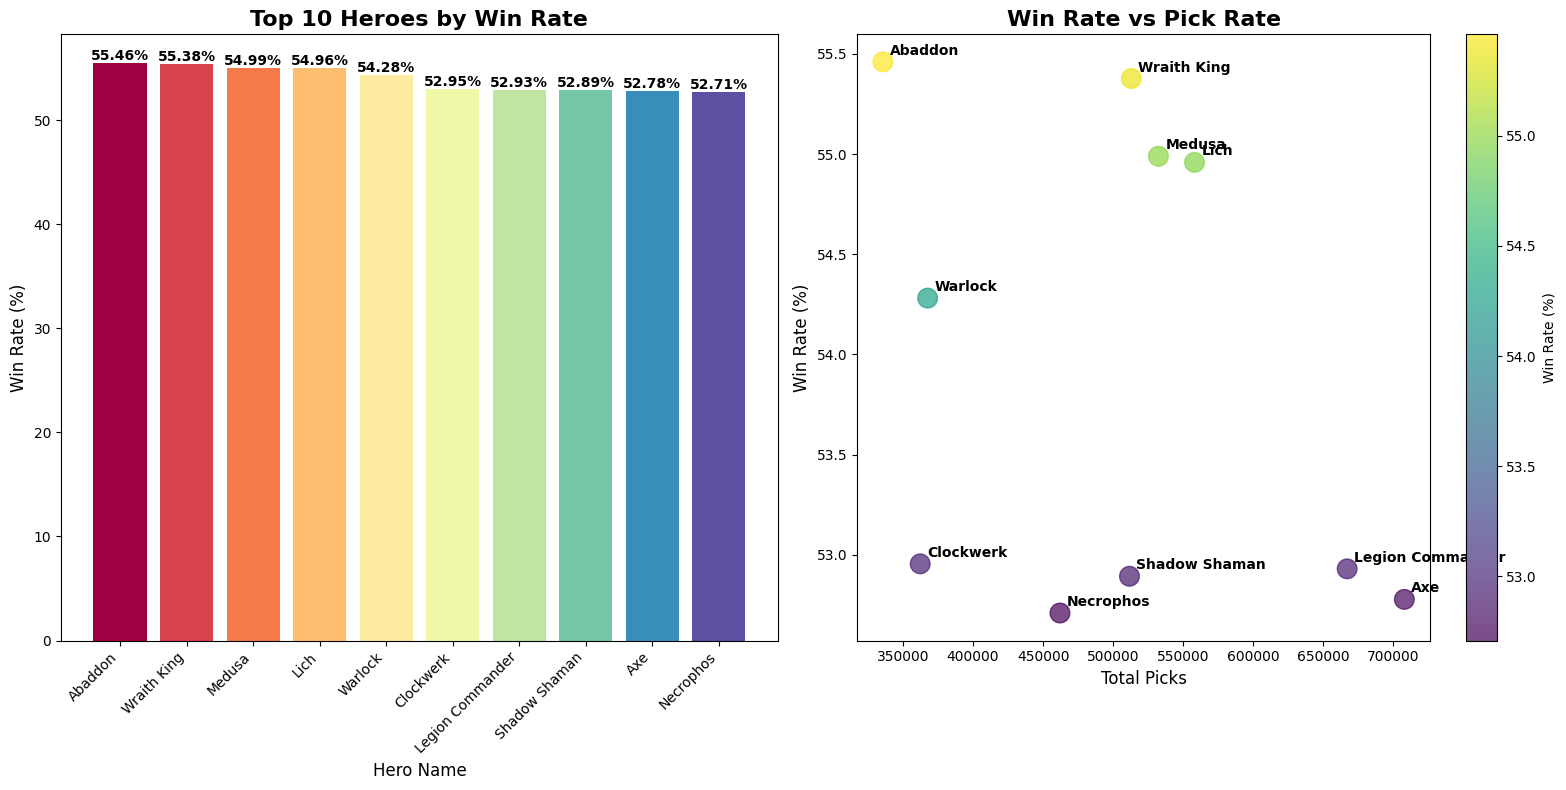


Detailed Hero Performance:
 Rank             Hero  Win Rate (%)  Total Picks
    1          Abaddon     55.460174       335612
    2      Wraith King     55.377056       513041
    3           Medusa     54.989058       532375
    4             Lich     54.958348       558190
    5          Warlock     54.280864       367566
    6        Clockwerk     52.954313       362267
    7 Legion Commander     52.929424       667179
    8    Shadow Shaman     52.892252       511712
    9              Axe     52.776977       708036
   10        Necrophos     52.708873       462074


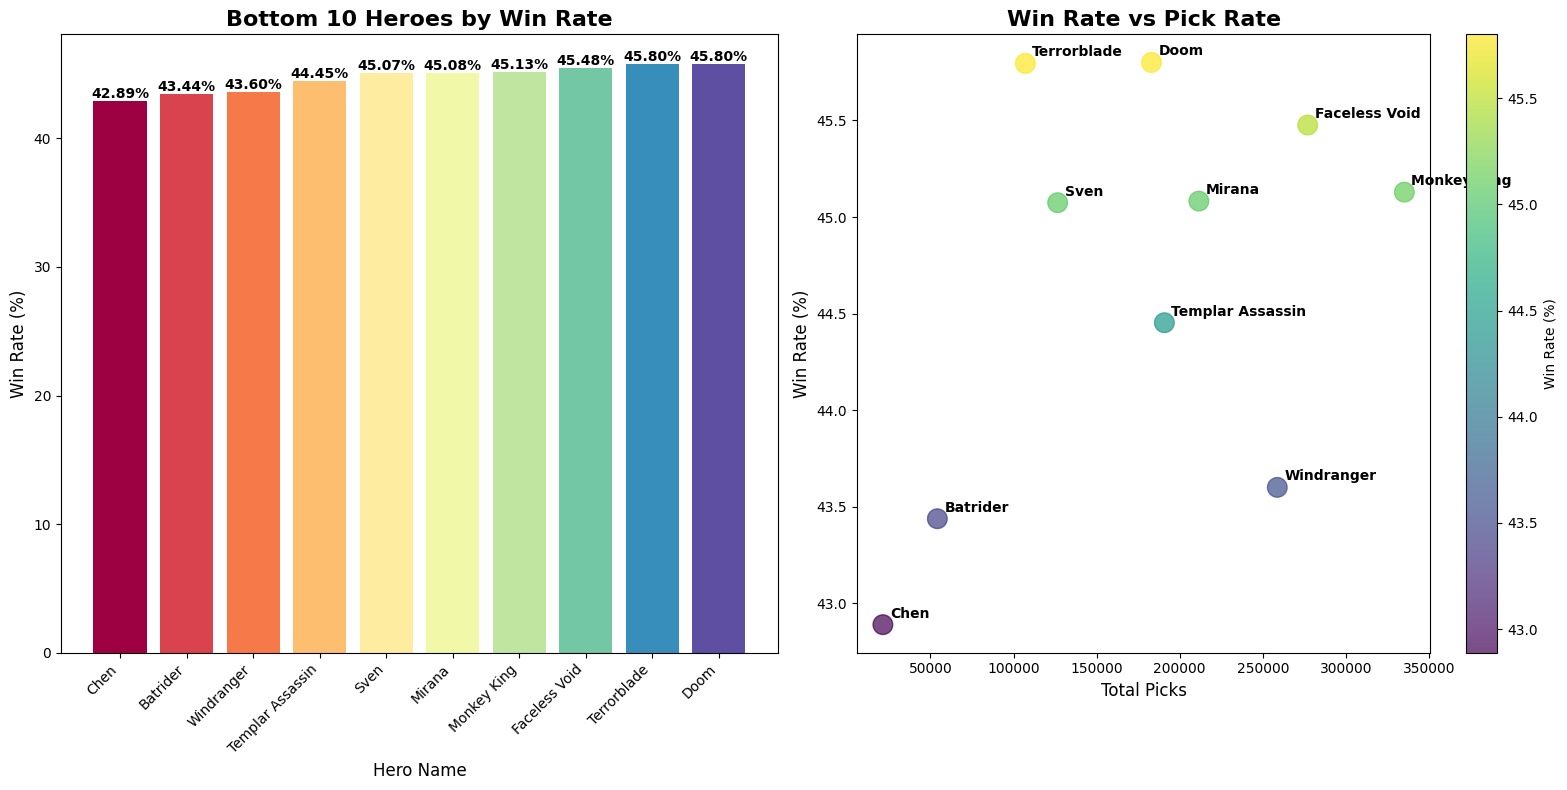


Detailed Hero Performance:
 Rank             Hero  Win Rate (%)  Total Picks
    1             Chen     42.888484        21423
    2         Batrider     43.437177        54184
    3       Windranger     43.599536       258700
    4 Templar Assassin     44.452540       190781
    5             Sven     45.074240       126549
    6           Mirana     45.082568       211523
    7      Monkey King     45.128836       335156
    8    Faceless Void     45.476468       277007
    9      Terrorblade     45.795649       107139
   10             Doom     45.800684       183006


In [60]:
def hero_winrate_visualization(top_10_heroes, key_word):
    # Set up the plot with a clean, modern style
    plt.figure(figsize=(16, 8))
    #plt.style.use('seaborn')

    # Create a bar plot with additional details
    plt.subplot(1, 2, 1)
    bars = plt.bar(top_10_heroes['localized_name'], top_10_heroes['pub_winrate'], 
                   color=plt.cm.Spectral(np.linspace(0, 1, 10)))
    
    # Customize the bar plot
    plt.title(f'{key_word} 10 Heroes by Win Rate', fontsize=16, fontweight='bold')
    plt.xlabel('Hero Name', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%', 
                 ha='center', va='bottom', fontweight='bold')

    # Create a scatter plot to show relationship between win rate and picks
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(top_10_heroes['pub_pick'], top_10_heroes['pub_winrate'], 
                          c=top_10_heroes['pub_winrate'], 
                          cmap='viridis', 
                          s=200, 
                          alpha=0.7)
    
    # Annotate each point with hero name
    for i, row in top_10_heroes.iterrows():
        plt.annotate(row['localized_name'], 
                     (row['pub_pick'], row['pub_winrate']),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontweight='bold')
    
    plt.colorbar(scatter, label='Win Rate (%)')
    plt.title('Win Rate vs Pick Rate', fontsize=16, fontweight='bold')
    plt.xlabel('Total Picks', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Additional detailed table
    print("\nDetailed Hero Performance:")
    detailed_table = top_10_heroes.copy()
    detailed_table['Rank'] = range(1, len(detailed_table) + 1)
    detailed_table = detailed_table[['Rank', 'localized_name', 'pub_winrate', 'pub_pick']]
    detailed_table.columns = ['Rank', 'Hero', 'Win Rate (%)', 'Total Picks']
    print(detailed_table.to_string(index=False))

# Assuming df_hero_winrate is your dataframe
top_10_heroes = df_hero_winrate.nlargest(10, 'pub_winrate')[['localized_name', 'pub_winrate', 'pub_pick']]
hero_winrate_visualization(top_10_heroes, 'Top')
hero_winrate_visualization(bottom_10_heroes, 'Bottom')

##### - In the above scatter plots we can observe that even though there are heros which have very obvious high lose rate, this gives give us conclusion that players don't just play for winning, even though the winrate might be low, but they might be fun to play. #####
##### - Similarly, even though some heros like Abbadon have high winrate, they aren't played much as they might be complex or not so much fun to play. #####

##  **Evaluating Hero Lore** ##

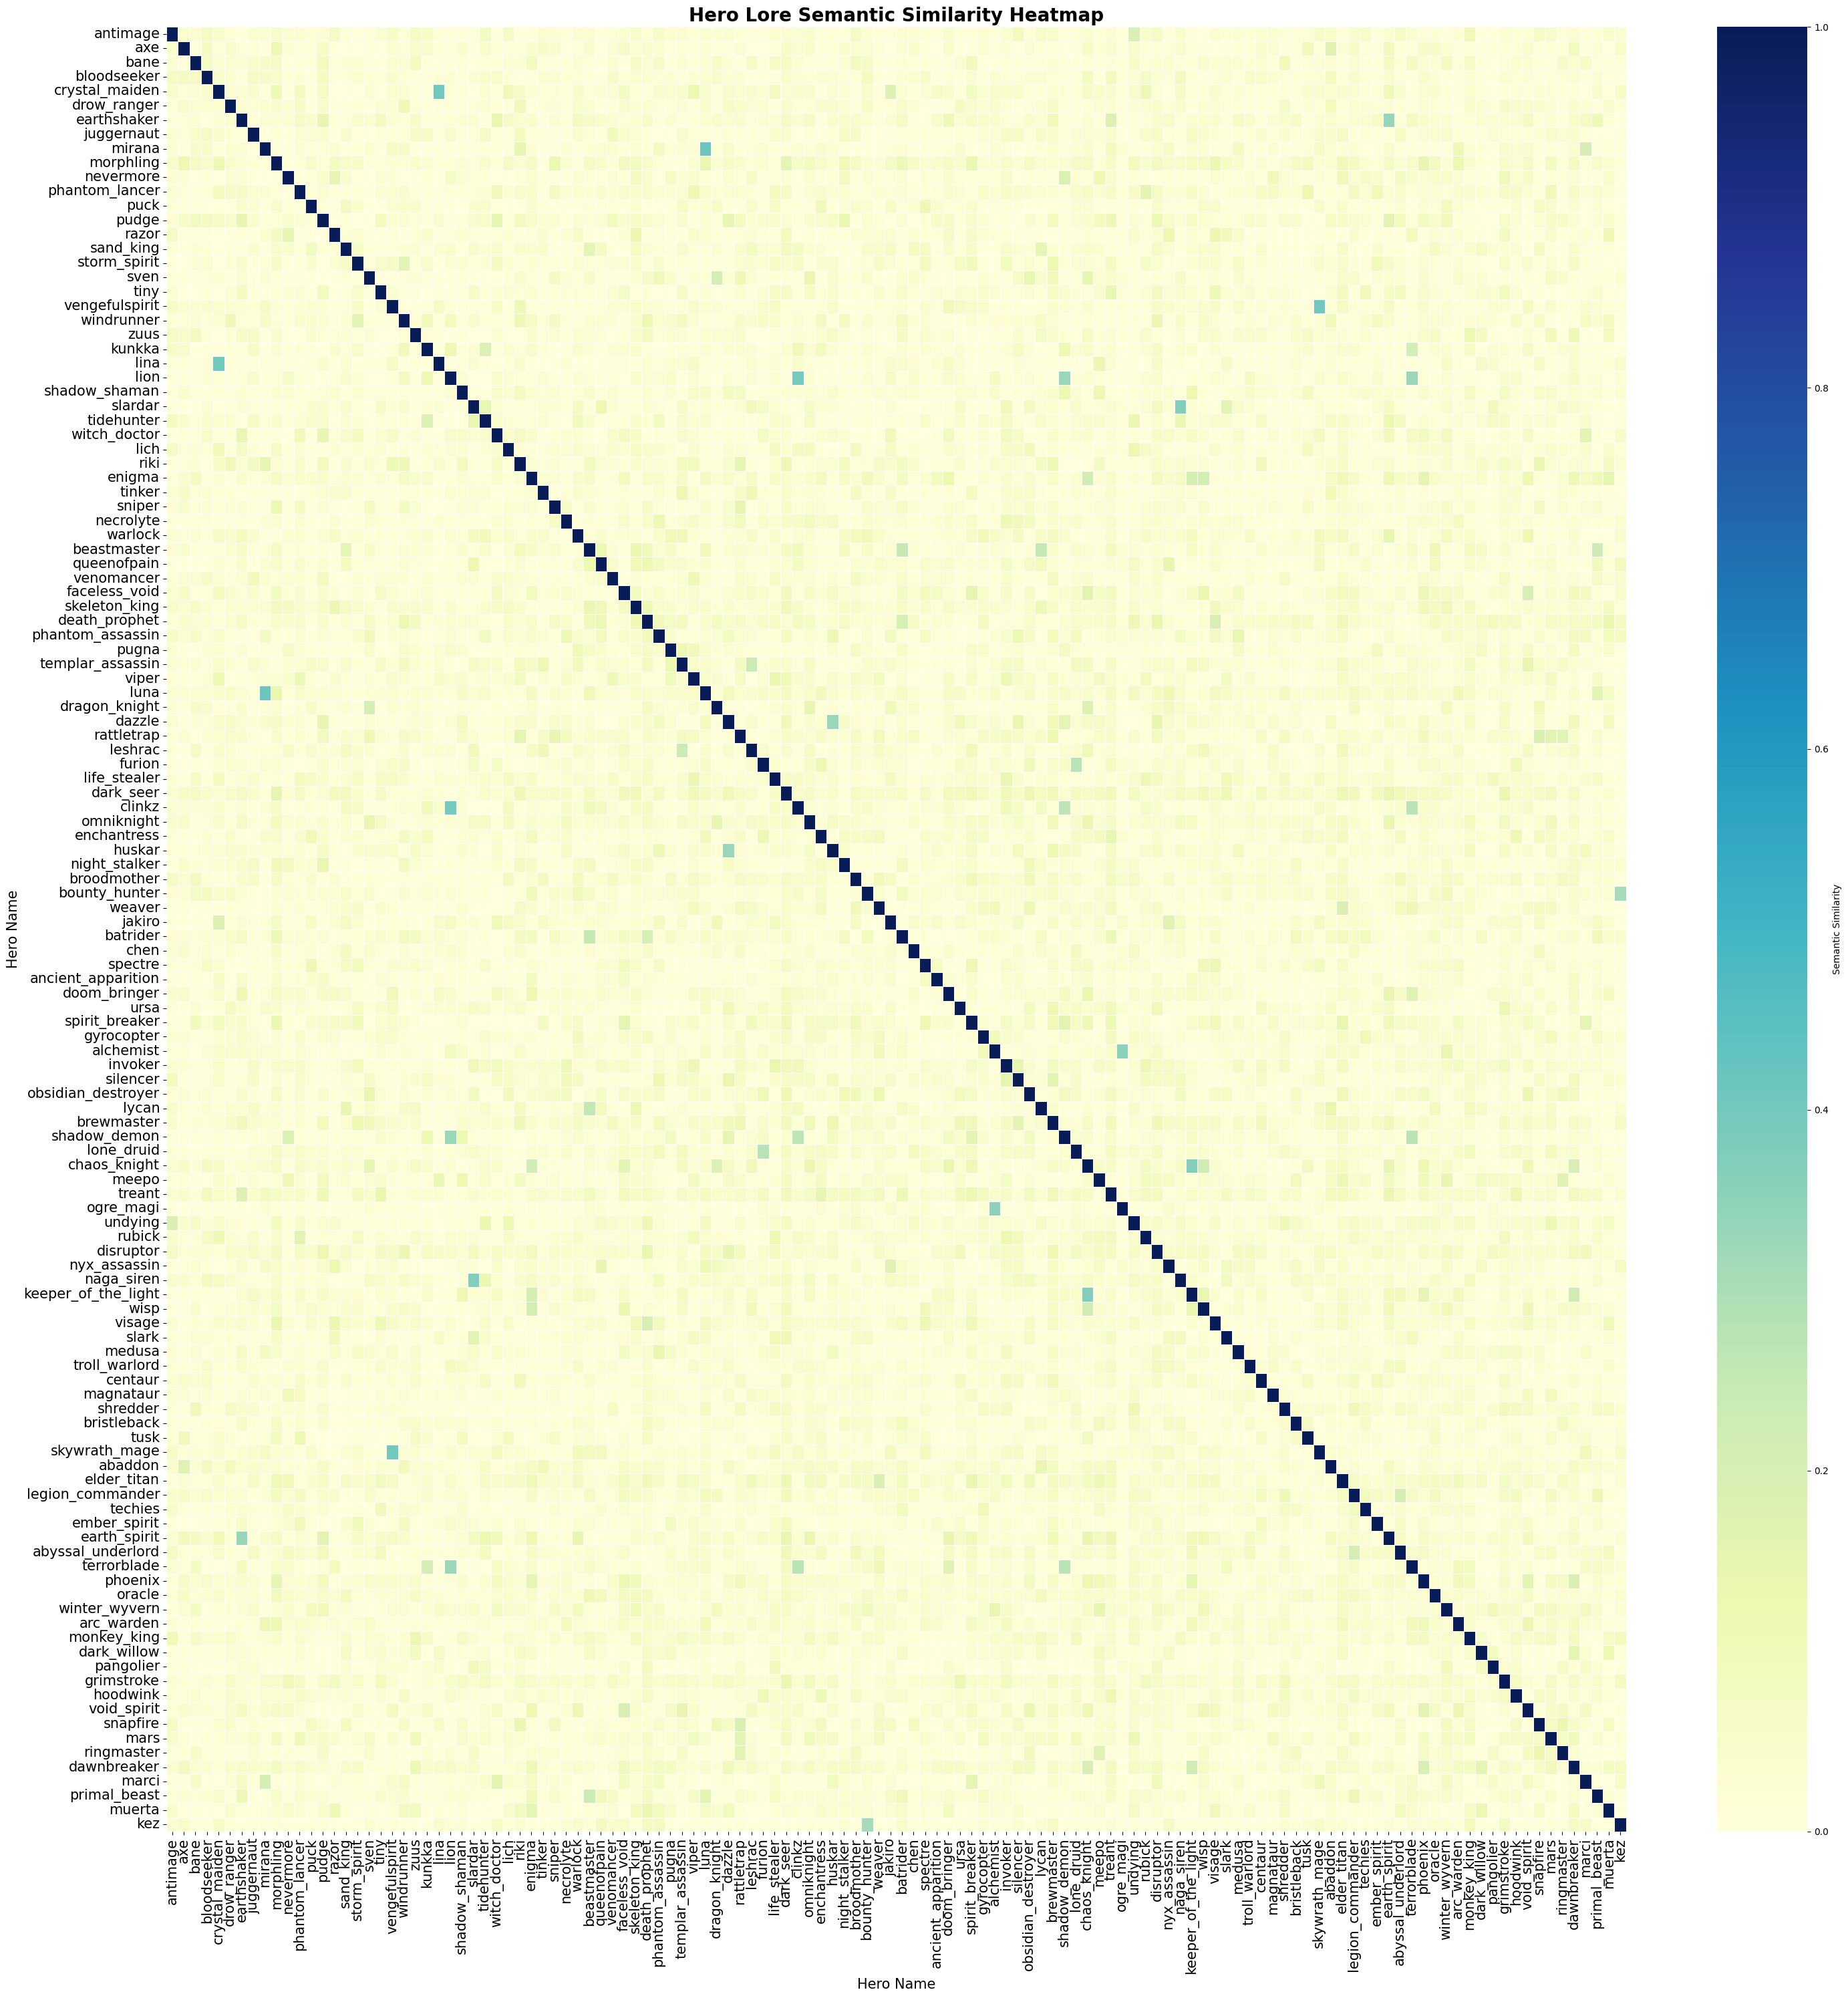

In [61]:
def hero_lore_semantic_analysis(hero_data, n_clusters=5):
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    lore_vectors = vectorizer.fit_transform(hero_data['lore'])
    
    # Cosine Similarity Matrix
    similarity_matrix = cosine_similarity(lore_vectors)
    
    # # Clustering (using KMeans to group heroes based on lore)
    # kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # hero_data['lore_cluster'] = kmeans.fit_predict(lore_vectors)

    # Visualization of the semantic similarity matrix as a heatmap
    plt.figure(figsize=(30, 30))
    
    # Heatmap (sns.heatmap is often more visually appealing and provides more options)
    sns.heatmap(similarity_matrix, cmap='YlGnBu', annot=False, xticklabels=hero_data['name'], yticklabels=hero_data['name'], cbar_kws={'label': 'Semantic Similarity'}, linewidths=0.5)
    
    # Title and Axis Labels
    plt.title('Hero Lore Semantic Similarity Heatmap', fontsize=20, fontweight='bold')
    plt.xlabel('Hero Name', fontsize=15)
    plt.ylabel('Hero Name', fontsize=15)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    
    # Tight layout to ensure labels are not cut off
    plt.tight_layout()
    plt.show()
    
    # # Print out cluster representatives (i.e., heroes within each cluster)
    # for cluster in range(n_clusters):
    #     print(f"\nCluster {cluster} Representatives:")
    #     cluster_heroes = hero_data[hero_data['lore_cluster'] == cluster]
    #     print(cluster_heroes[['name', 'lore']].sample(min(3, len(cluster_heroes))))
    
    #return hero_data, similarity_matrix

# Load the JSON file
file_path = '/home/ad-magus-apex/Downloads/Q4/EDA/Dota-Stats/data/hero_data/hero_lore/hero_lore.json'

with open(file_path, 'r') as f:
    hero_lore = json.load(f)

# Convert JSON to DataFrame
df_hero_lore = pd.DataFrame(list(hero_lore.items()), columns=['name', 'lore'])

# Run semantic analysis
hero_lore_semantic_analysis(df_hero_lore)


##### From the above graph we retrive hero background story similarity and find some interesting insights. #####
##### - One of which we can see is Lina and Crystal Mayden. If we dig more we find out that they are sisters. #####
##### - One more is Terror Blade and Lion, we found that they come from same place from a mystrious relm. #####
##### - We found such interesting details more with Earth spirit and Earth shaker, Kez and Bounty Hunter, Chaos Knight and Dawn breaker etc. #####

In [62]:
# from sklearn.decomposition import LatentDirichletAllocation

# def topic_modeling(hero_data, n_topics=5):
#     vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
#     lore_vectors = vectorizer.fit_transform(hero_data['lore'])
    
#     lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
#     lda.fit(lore_vectors)
    
#     # Print the top words in each topic
#     feature_names = vectorizer.get_feature_names_out()
#     for topic_idx, topic in enumerate(lda.components_):
#         print(f"Topic #{topic_idx}:")
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))  # top 10 words per topic
    
#     return lda

# lda_model = topic_modeling(df_hero_lore)
# This is one of the things we tried which didn't give any adiquate result.

##  **Evaluating game analysis based on time of the players played in 23 different regions.** ##

### Converting time to respective region from UTC ###

In [63]:
region_offsets = {
    1: -8,   # US WEST
    2: -5,   # US EAST
    3: +1,   # EUROPE
    5: +8,   # SINGAPORE
    6: +4,   # DUBAI
    7: +10,  # AUSTRALIA
    8: +1,   # STOCKHOLM
    9: +1,   # AUSTRIA
    10: -3,  # BRAZIL
    11: +2,  # SOUTH AFRICA
    12: +8,  # PW TELECOM SHANGHAI
    13: +8,  # PW UNICOM
    14: -4,  # CHILE
    15: -5,  # PERU
    16: +5.5, # INDIA
    17: +8,  # PW TELECOM GUANGDONG
    18: +8,  # PW TELECOM ZHEJIANG
    19: +9,  # JAPAN
    20: +8,  # PW TELECOM WUHAN
    25: +8,  # PW UNICOM TIANJIN
    37: +8,  # TAIWAN
    38: -3   # ARGENTINA
}
df_pub_matches['hour'] = df_pub_matches['start_time'].dt.hour

def adjust_hour_to_region(hour, region):
    utc_offset = region_offsets.get(region, 0)  # Default offset is 0 if region is not in mapping
    local_hour = (hour + utc_offset) % 24  # Adjust hour and wrap around with modulo 24
    return local_hour

# Apply the conversion
df_pub_matches['local_hour'] = df_pub_matches.apply(lambda row: adjust_hour_to_region(row['hour'], row['region']), axis=1)

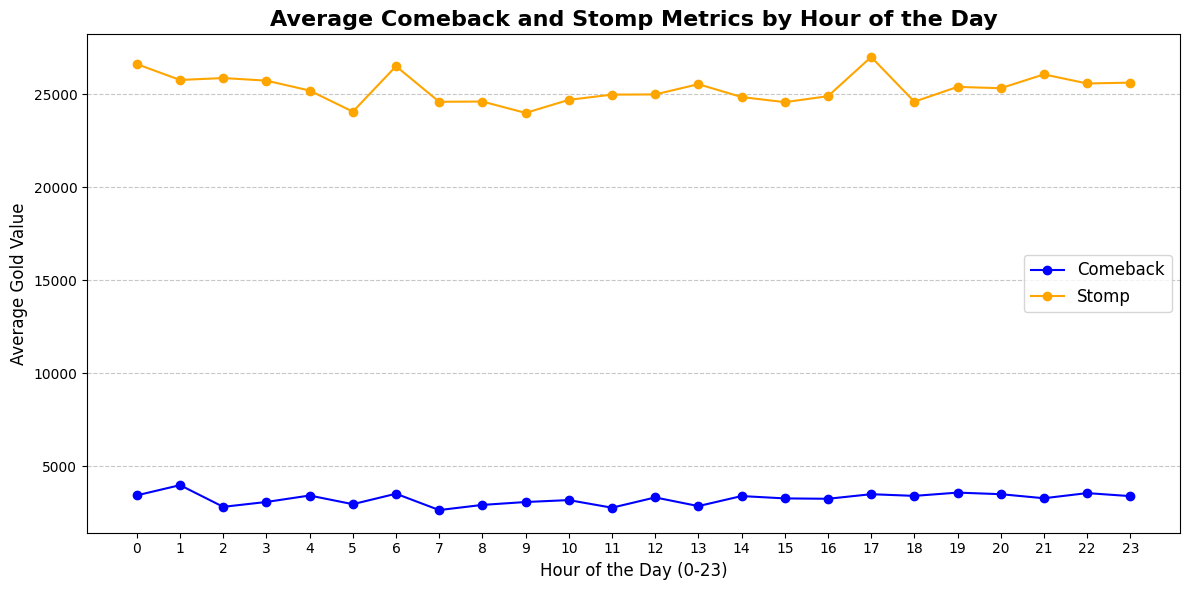

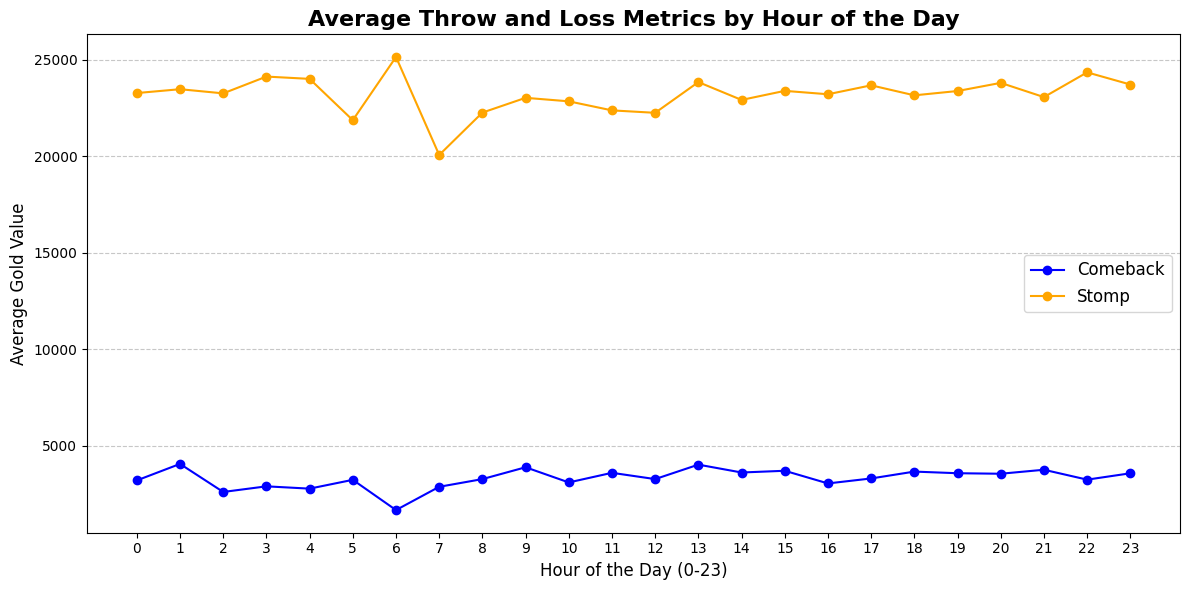

In [64]:
df_data_hourly = df_pub_matches.dropna(subset=['comeback']).groupby('local_hour')[['comeback', 'stomp']].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot 'comeback'
plt.plot(df_data_hourly['local_hour'], df_data_hourly['comeback'], label='Comeback', marker='o', linestyle='-', color='blue')

# Plot 'stomp'
plt.plot(df_data_hourly['local_hour'], df_data_hourly['stomp'], label='Stomp', marker='o', linestyle='-', color='orange')

# Customize the plot
plt.title('Average Comeback and Stomp Metrics by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Gold Value', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

df_data_hourly = df_pub_matches.dropna(subset=['throw']).groupby('local_hour')[['throw', 'loss']].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot 'Throw'
plt.plot(df_data_hourly['local_hour'], df_data_hourly['throw'], label='Comeback', marker='o', linestyle='-', color='blue')

# Plot 'Loss'
plt.plot(df_data_hourly['local_hour'], df_data_hourly['loss'], label='Stomp', marker='o', linestyle='-', color='orange')

# Customize the plot
plt.title('Average Throw and Loss Metrics by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Gold Value', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

##### Although we have 20,000 match data, we still see that there is a spike at around 5pm to 7pm of the day, we figured that that's where most players are highly motivated to play as its also when most patches (New features, Bug fixes) are released. Statsically its also the time when people comeback from schools, work.   #####

##  **Analysis on gold advantage, total kills and match duration.** ##

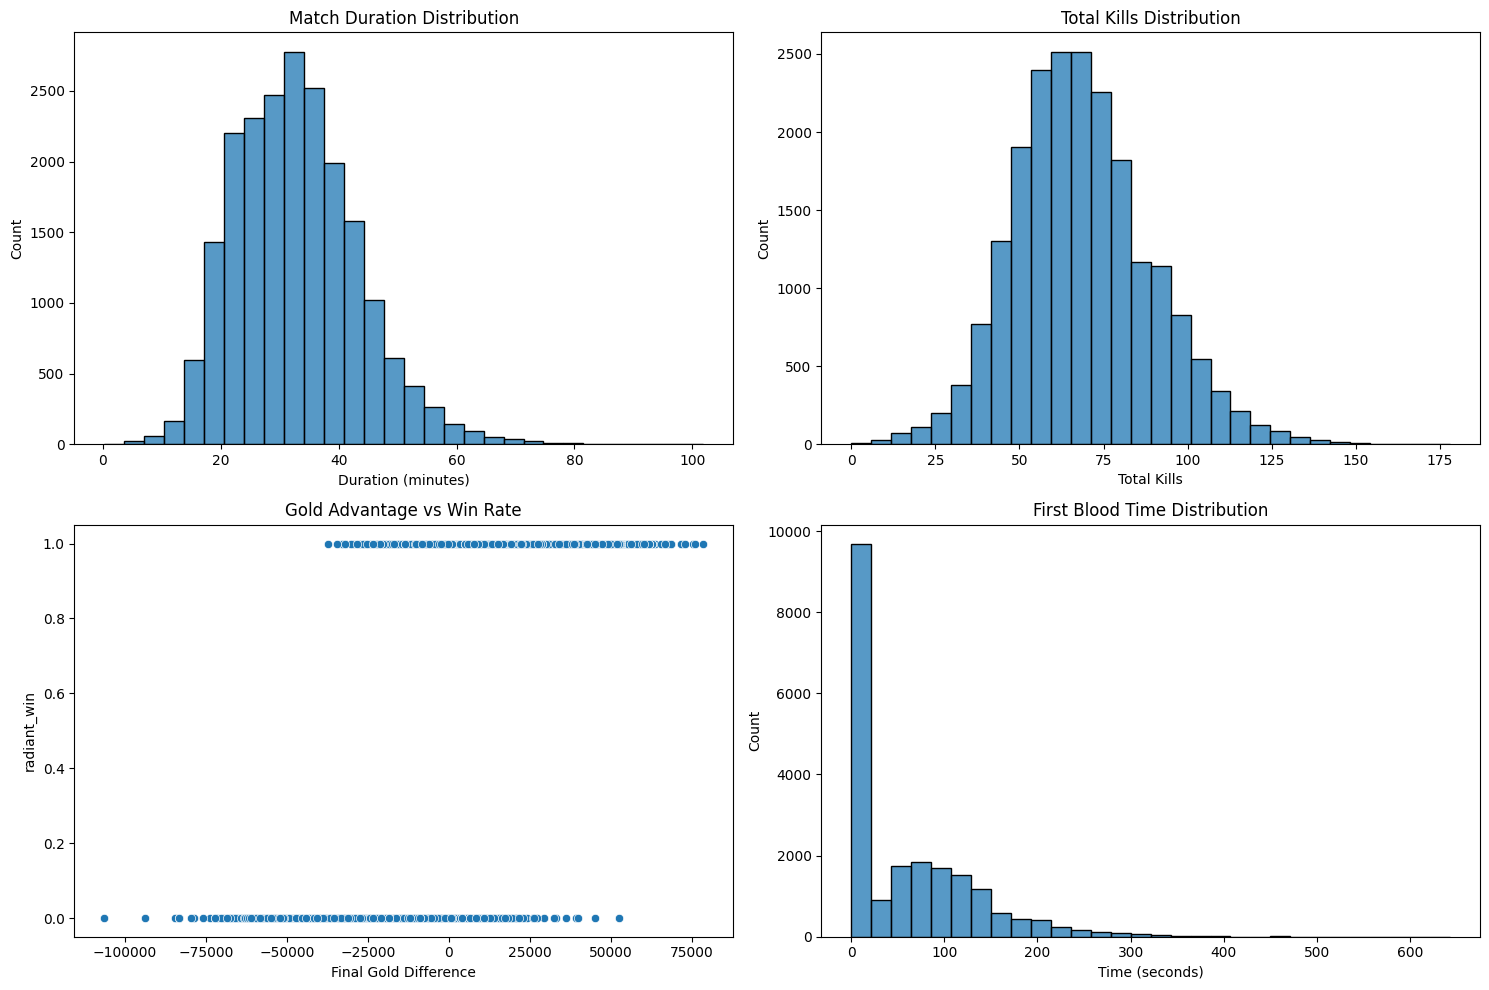

In [65]:
# Here is some early analysis on the prepared data.

def early_analysis(df):
    """
    Comprehensive analysis of Dota 2 match data

    Parameters:
    df (pandas.DataFrame): DataFrame containing Dota 2 match data
    """
    # Data Cleaning
    def clean_list_columns(x):
        if isinstance(x, str):
            # Remove brackets and split string into list
            return [float(i) for i in x.strip('[]').split(',') if i]
        return x

    # Convert string representations of lists to actual lists
    df['radiant_gold_adv'] = df['radiant_gold_adv'].apply(clean_list_columns)
    df['radiant_xp_adv'] = df['radiant_xp_adv'].apply(clean_list_columns)

    # Convert timestamps to datetime
    df['start_time'] = pd.to_datetime(df['start_time'])

    # Create derived features
    df['match_length_minutes'] = df['duration'] / 60
    df['gold_difference_final'] = df['radiant_gold_adv'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else np.nan)
    df['xp_difference_final'] = df['radiant_xp_adv'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else np.nan)
    df['total_kills'] = df['radiant_score'] + df['dire_score']
    df['kill_difference'] = df['radiant_score'] - df['dire_score']

    # Analysis results
    analysis = {
        'basic_stats': {
            'total_matches': len(df),
            'radiant_win_rate': (df['radiant_win'].mean() * 100),
            'avg_match_duration': df['match_length_minutes'].mean(),
            'avg_first_blood_time': df['first_blood_time'].mean(),
            'avg_total_kills': df['total_kills'].mean()
        },
        'match_patterns': {
            'comeback_rate': (df['comeback'].mean() * 100),
            'stomp_rate': (df['stomp'].mean() * 100),
            'throw_rate': (df['throw'].mean() * 100)
        }
    }

    # Calculate win conditions
    analysis['win_conditions'] = {
        'gold_lead_win_rate': len(df[(df['gold_difference_final'] > 0) & (df['radiant_win'])] ) / len(df[df['gold_difference_final'] > 0]) * 100,
        'xp_lead_win_rate': len(df[(df['xp_difference_final'] > 0) & (df['radiant_win'])] ) / len(df[df['xp_difference_final'] > 0]) * 100
    }

    return analysis

def plot_match_metrics(df):
    """
    Create visualizations for key match metrics
    """
    plt.figure(figsize=(15, 10))

    # Plot 1: Match Duration Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['match_length_minutes'], bins=30)
    plt.title('Match Duration Distribution')
    plt.xlabel('Duration (minutes)')

    # Plot 2: Kill Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(df['total_kills'], bins=30)
    plt.title('Total Kills Distribution')
    plt.xlabel('Total Kills')

    # Plot 3: Gold Advantage vs Win Rate
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='gold_difference_final', y='radiant_win')
    plt.title('Gold Advantage vs Win Rate')
    plt.xlabel('Final Gold Difference')

    # Plot 4: First Blood Time Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(df['first_blood_time'], bins=30)
    plt.title('First Blood Time Distribution')
    plt.xlabel('Time (seconds)')

    plt.tight_layout()
    return plt

analysis_results = early_analysis(df_pub_matches)
plots = plot_match_metrics(df_pub_matches)

##### - 1st graph is duration distribution where we can observe it has quite normalized distribution and peaks around 35min. #####
##### - 2nd graph 60 - 80 being most avarage skills in the game #####
##### - 3rd graph, this is the graph of gold advantage vs winrate. We can make an interested observation in this, we mostly assume that higher gold per minute of team than opponent usually leads to win and that is true, but there are some cases(outliers) we can see even though gold advantage (gold per minute as compared to opponent team) is high, they lost and in some cases where gold advantage is very still they won as they gave a come back in game. #####
##### - 4th graph, we can see most of first kills taking place very early in the game indicating player wanting to engage in fights as much as possible. #####

### **Analysis on players playing together (party)**  ###

In [66]:
df_pub_matches[['radiant_heros', 'dire_heros', 'radiant_party_size','dire_party_size']] = df_players['players'].apply(
    lambda players: pd.Series({
        'radiant_heros': [player['hero_id'] for player in players if player['team_number'] == 1],
        'dire_heros': [player['hero_id'] for player in players if player['team_number'] == 0],
        'radiant_party_size': [player['party_size'] for player in players if player['team_number'] == 1],
        'dire_party_size': [player['party_size'] for player in players if player['team_number'] == 0],
    })
)

df_pub_matches['radiant_party_size'] = df_pub_matches['radiant_party_size'].apply(max)
df_pub_matches['dire_party_size'] = df_pub_matches['dire_party_size'].apply(max)

In [67]:
# Initialize a dictionary to store hero combinations with their win/loss counts
hero_combination_stats = defaultdict(lambda: {'win': 0, 'lose': 0})
party_stats = defaultdict(lambda: {'win':0, 'lose':0, 'comeback':0, 'throw':0, 'loss':0, 'stomp':0, 'radiant_win':0, 'dire_win':0})
# Iterate through each match in df_pub_matches
for _, match in df_pub_matches.iterrows():

    # Get the sorted hero combinations for Radiant and Dire
    radiant_comb = tuple(sorted(match['radiant_heros']))
    dire_comb = tuple(sorted(match['dire_heros']))

    radiant_party_size = match['radiant_party_size']
    dire_party_size = match['dire_party_size']
    
    # Update stats for Radiant team
    if match['radiant_win']:  # Radiant won
        party_stats[radiant_party_size]['radiant_win'] += 1
        party_stats[radiant_party_size]['win'] += 1
        party_stats[dire_party_size]['lose'] += 1

        hero_combination_stats[radiant_comb]['win'] += 1
        hero_combination_stats[dire_comb]['lose'] += 1

        party_stats[radiant_party_size]['throw'] += match['throw']
        party_stats[radiant_party_size]['loss'] += match['loss']
    else:  # Dire won
        party_stats[radiant_party_size]['dire_win'] += 1
        party_stats[radiant_party_size]['lose'] += 1
        party_stats[dire_party_size]['win'] += 1

        party_stats[dire_party_size]['comeback'] += match['comeback']
        party_stats[dire_party_size]['stomp'] += match['stomp']

        hero_combination_stats[radiant_comb]['lose'] += 1
        hero_combination_stats[dire_comb]['win'] += 1

    party_stats['trow_devisor'] = party_stats[radiant_party_size]['win']
    party_stats['comeback_devisor'] = party_stats[dire_party_size]['win']
# Convert the dictionary to a DataFrame
df_hero_combination = pd.DataFrame([
    {'hero_combination': comb, 'win': stats['win'], 'lose': stats['lose']}#, 'radiant_win':stats['radiant_win'], 'dire_win':stats['dire_win']}
    for comb, stats in hero_combination_stats.items()
])
print(party_stats)
df_party_stats = pd.DataFrame([
    {
        'party_size': ps,
        'win': stats['win'],
        'lose': stats['lose'],
        'mean_comeback': stats['comeback'] / stats['dire_win'] if stats['dire_win'] > 0 else 0,
        'mean_stomp': stats['stomp'] / stats['dire_win'] if stats['dire_win'] > 0 else 0,
        'mean_loss': stats['loss'] / stats['radiant_win'] if stats['radiant_win'] > 0 else 0,
        'mean_throw': stats['throw'] / stats['radiant_win'] if stats['radiant_win'] > 0 else 0
    }
    for ps, stats in party_stats.items() if isinstance(ps, int)  # Filter only party size keys
])

# Sort by wins or other criteria if needed
df_hero_combination.sort_values(by='win', ascending=False, inplace=True)
df_party_stats.sort_values(by='party_size', ascending=True, inplace=True)

# Reset index for cleaner display
df_hero_combination.reset_index(drop=True, inplace=True)
df_party_stats.reset_index(drop=True, inplace=True)

print(df_hero_combination)

df_party_stats['win_rate'] = (df_party_stats['win'] / df_party_stats['lose']) * 100


defaultdict(<function <lambda> at 0x73f34843bb50>, {1: {'win': 11047, 'lose': 10993, 'comeback': 16090624.0, 'throw': 18319013.0, 'loss': 128169265.0, 'stomp': 129828559.0, 'radiant_win': 5750, 'dire_win': 5256}, 'trow_devisor': 11047, 'comeback_devisor': 11047, 3: {'win': 3292, 'lose': 3263, 'comeback': 5705806.0, 'throw': 6581069.0, 'loss': 41769671.0, 'stomp': 40926286.0, 'radiant_win': 1722, 'dire_win': 1558}, 2: {'win': 4324, 'lose': 4372, 'comeback': 7364967.0, 'throw': 8366700.0, 'loss': 56784299.0, 'stomp': 53408385.0, 'radiant_win': 2288, 'dire_win': 2112}, 5: {'win': 1236, 'lose': 1238, 'comeback': 1893461.0, 'throw': 2289734.0, 'loss': 15389652.0, 'stomp': 14215349.0, 'radiant_win': 672, 'dire_win': 577}, 4: {'win': 736, 'lose': 771, 'comeback': 1981659.0, 'throw': 1940907.0, 'loss': 9918906.0, 'stomp': 11505160.0, 'radiant_win': 357, 'dire_win': 344}, 10: {'win': 179, 'lose': 179, 'comeback': 188015.0, 'throw': 165705.0, 'loss': 1647884.0, 'stomp': 1524021.0, 'radiant_win':

In [78]:
df_party_stats

,party_size,win,lose,mean_comeback,mean_stomp,mean_loss,mean_throw,win_rate,winrate
1,1,11047,10993,3061.382040,24701.019597,22290.306957,3185.915304,100.491222,0.501225
2,2,4324,4372,3487.200284,25288.061080,24818.312500,3656.774476,98.902104,0.497240
3,3,3292,3263,3662.263158,26268.476252,24256.487224,3821.759001,100.888753,0.502212
4,4,736,771,5760.636628,33445.232558,27784.050420,5436.714286,95.460441,0.488388
5,5,1236,1238,3281.561525,24636.653380,22901.267857,3407.342262,99.838449,0.499596


/tmp/ipykernel_18693/2845039330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_stats['winrate'] = df_party_stats['win'] / (df_party_stats['win'] + df_party_stats['lose'])


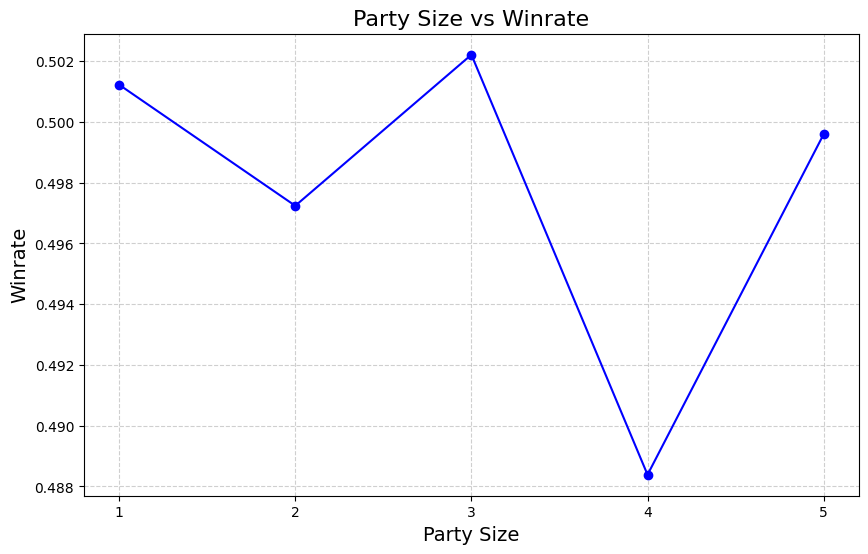

In [79]:
# Add a winrate column to df_party_stats
df_party_stats['winrate'] = df_party_stats['win'] / (df_party_stats['win'] + df_party_stats['lose'])

# Plot Party Size vs Winrate
plt.figure(figsize=(10, 6))
plt.plot(df_party_stats['party_size'], df_party_stats['winrate'], marker='o', linestyle='-', color='blue')
plt.title('Party Size vs Winrate', fontsize=16)
plt.xlabel('Party Size', fontsize=14)
plt.ylabel('Winrate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_party_stats['party_size'])
plt.show()


##### We can observe that party of 3 does the best from the data we have. #####

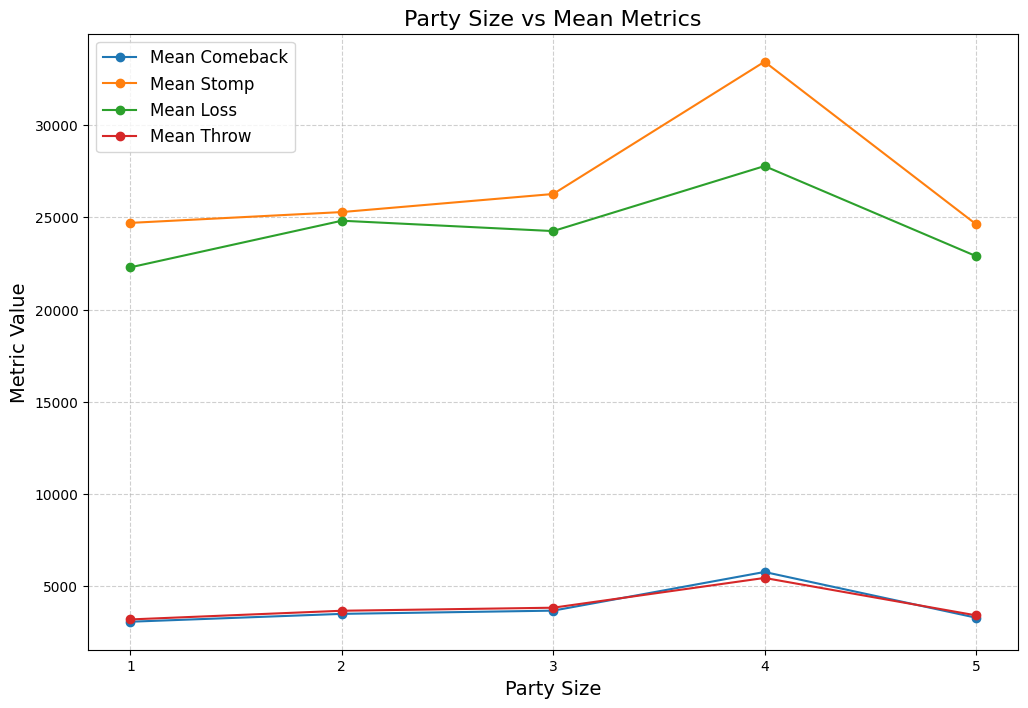

In [80]:
# Plot Party Size vs Mean Metrics
plt.figure(figsize=(12, 8))

# Plot each metric
plt.plot(df_party_stats['party_size'], df_party_stats['mean_comeback'], marker='o', linestyle='-', label='Mean Comeback')
plt.plot(df_party_stats['party_size'], df_party_stats['mean_stomp'], marker='o', linestyle='-', label='Mean Stomp')
plt.plot(df_party_stats['party_size'], df_party_stats['mean_loss'], marker='o', linestyle='-', label='Mean Loss')
plt.plot(df_party_stats['party_size'], df_party_stats['mean_throw'], marker='o', linestyle='-', label='Mean Throw')

# Customize plot
plt.title('Party Size vs Mean Metrics', fontsize=16)
plt.xlabel('Party Size', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([1, 2, 3, 4, 5])
plt.show()


#### Here we are tying to figure out which size party (players playing together) have overall best data. Alough it is not quite what we might expect (5 team party to have highest comeback because of easier communication) turns out its not a deal breaker and players find a way to connect in game and communicate within game as they the game goes, they understand each other and build a sense of how to engage in different within game activities like farming, team fights, warding, pushing.####
#### One thing we can observe that party of one has bit more loss and than other party sizes and party of 4 has higher activities in stomp, loss as compared to other party size.####